# Facial Reaction Recognition Software

## Import libraries

In [400]:
import numpy as np
import matplotlib.pyplot as plt
# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [401]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [402]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [403]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


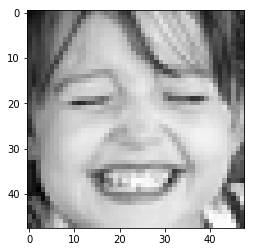

facial emotion: happy


In [404]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Catagorise Faces as Happy or Sad

##### Extracting and seperating Happy and Sad Faces #####

In [405]:
import numpy as np
import pandas as pd

df = pd.DataFrame(y_training)
##### Happy Data at index 3 #####
# indicates 7215 are happy
happy_data = df.loc[df[3] == 1]
print(happy_data.shape)
#print(happy_data)
##### Sad Data at index 4 #####
# indicates 4830 are sad
sad_data = df.loc[df[4] == 1]
print(sad_data.shape)
#print(sad_data)
### 12045 happy and sad data ###
# combine the data, combined will contain indicies for only happy and sad cases
combined = happy_data[0] + sad_data[0]
print(combined.shape)

# Fill in the data for happy and sad into respective indicies
combined_data_y = np.zeros(len(combined))
combined_data_x = np.zeros((len(combined), 48, 48))

k = 0

for i in range(len(y_training)):
    if y_training[i,3] == 1:
        combined_data_y[k] = 3
        combined_data_x[k] = x_training[i,:]
        k = k + 1
        
    elif y_training[i,4] == 1:
        combined_data_y[k] = 4
        combined_data_x[k] = x_training[i,:]
        k = k + 1
    
    else:
        k = k

# Training
print(combined_data_x.shape)

# Fill in the data for happy and sad into respective indicies for testing
df2 = pd.DataFrame(y_testing)
### Should get 1548 combined together ###
happy_data2 = df2.loc[df2[3] == 1]
sad_data2 = df2.loc[df2[4] == 1]
# combine the data, combined will contain indicies for only happy and sad cases on testing
combined_2 = happy_data2[0] + sad_data2[0]
print(combined_2.shape)
combined_data_y_testing = np.zeros(len(combined_2))
combined_data_x_testing = np.zeros((len(combined_2), 48, 48))

k2 = 0
for i in range(len(y_testing)):
    if y_testing[i,3] == 1:
        combined_data_y_testing[k2] = 3
        combined_data_x_testing[k2] = x_testing[i,:]
        k2 = k2 + 1
        
    elif y_testing[i,4] == 1:
        combined_data_y_testing[k2] = 4
        combined_data_x_testing[k2] = x_testing[i,:]
        k2 = k2 + 1
    
    else:
        k2 = k2
# Testing data
print(combined_data_y_testing.shape)
print(combined_data_x_testing.shape)

x_testing_hpy_sad = combined_data_x_testing.reshape(1548, 2304)
print(x_testing_hpy_sad.shape)


(7215, 7)
(4830, 7)
(12045,)
(12045, 48, 48)
(12045,)
(1548,)
(1548,)
(1548, 48, 48)
(1548, 2304)


##### Applying PCA and LDA #####

In [406]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Reshape training data for x to allow for PCA and LDA
combined_data_x = combined_data_x.reshape(12045, 2304)
print(combined_data_x.shape)

##### Performing PCA #####
pca = PCA(0.95, whiten = True).fit(combined_data_x)
components = pca.components_
print(components.shape)

##### Performing LDA #####
lda = LDA()
x_Lda = lda.fit(combined_data_x, combined_data_y) 


(12045, 2304)
(243, 2304)


##### Displaying Sample Faces for PCA #####

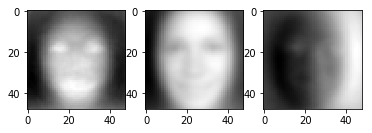

In [407]:
##### Displaying Sample Faces for PCA #####
plt.subplot(1,3,1)
plt.imshow(components[0].reshape(48,48), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(components[1].reshape(48,48), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(components[2].reshape(48,48), cmap='gray')

##### Displaying Sample Faces for LDA #####


(1, 2304)


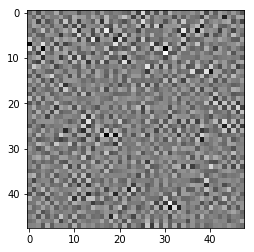

In [408]:
coef = x_Lda.coef_
print(coef.shape)
plt.figure()
plt.imshow(coef[0].reshape(48,48), cmap='gray')

##### Applying Naive Bayes to classify faces as happy or sad. and getting the accuracy ##### 

In [409]:
from sklearn.naive_bayes import GaussianNB

#### Perform Naive Bayes ####
gnb = GaussianNB()
gaussian = gnb.fit(combined_data_x, combined_data_y).predict(combined_data_x)

#### Accuracy from Naive Bayes ####
Gaus_accuracy = gnb.score(x_testing_hpy_sad,combined_data_y_testing)
print("Accuracy from Naive Bayes is: {0}" .format(Gaus_accuracy))

Accuracy from Naive Bayes is: 0.5904392764857881


##### Applying Logistic Regression to classify faces as happy or sad. and getting the accuracy ##### 


In [410]:
from sklearn.linear_model import LogisticRegression as LR

#### Performs Logistic Regression ####
Log_reg = LR(random_state=0, solver='lbfgs', multi_class='multinomial')
final_reg = Log_reg.fit(combined_data_x, combined_data_y)

#### Accuracy from Logistic Regression ####
Log_accuracy = Log_reg.score(x_testing_hpy_sad, combined_data_y_testing)
print("Accuracy from Logistic Regression is: {0}" .format(Log_accuracy))


Accuracy from Logistic Regression is: 0.6937984496124031


##### Applying Support Vector Machines to classify faces as happy or sad. and getting the accuracy ##### 


In [262]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA

#### Performing PCA ####
pca_svm = PCA(n_components= 4)
Training_x = pca.fit_transform(combined_data_x)
Testing = pca.transform(x_testing_hpy_sad)

(1548,)
(1548,)
(1548, 48, 48)
(12045, 2304)
(1548, 2304)


In [270]:
from sklearn.preprocessing import StandardScaler

#### Standardizing ####
SS = StandardScaler()
Training_x = SS.fit_transform(Training_x)
Testing = SS.transform(Testing)

#### Computing the SVM ####
svm_kernel = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
svm_kernel_2 = svm_kernel.fit(Training_x,combined_data_y)

#### Prediction ####
y_predictions_2 = svm_kernel_2.predict(Testing)

In [284]:
from sklearn.metrics import accuracy_score

#### Accuracy from the SVM ####
svm_accuracy=accuracy_score(combined_data_y_testing, y_predictions_2)
print("The accuracy is: {0}".format(svm_accuracy))

The accuracy is: 0.5962532299741602


#### Finding the 5 happiest faces and the 5 saddest faces .#### 

(1548, 2304)
(1548, 243)
(12045, 243)
(12045,)
(1548, 2)


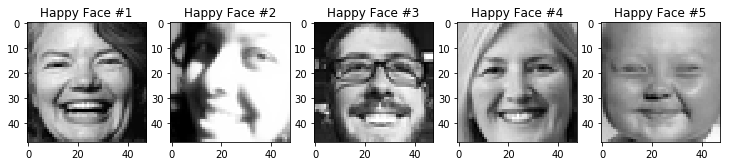

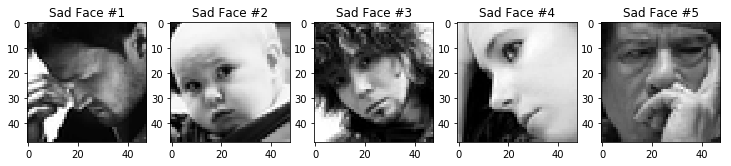

In [411]:
#### Do PCA for dimensionality ####
combined_data_x_2 = combined_data_x.reshape(12045, 2304)
pca_new_test1 = PCA(0.95, whiten = True).fit(combined_data_x_2)
pca_new_test = pca_new_test1.transform(x_testing_hpy_sad)
pca_happy_sad = PCA(0.95, whiten = True).fit_transform(combined_data_x_2)
print(x_testing_hpy_sad.shape)
print(pca_new_test.shape)
print(pca_happy_sad.shape)
print(combined_data_y.shape)

#### Use regression model to predict probabilities ####
log_reg_model = LR(random_state=0, solver='lbfgs',multi_class='multinomial').fit(pca_happy_sad, combined_data_y)
probabilities_log = log_reg_model.predict_proba(pca_new_test)
print(probabilities_log.shape)

#### Ordering/Sorting the probabilities ####
sad_data = probabilities_log[:,0].argsort()[:5]
happy_data = probabilities_log[:,1].argsort()[:5]

#### Plotting Happiest and Saddest Faces ####
fig = plt.figure(figsize=(15,15))
fig_count = 1
for i in range (0,5):
    happy = x_testing_hpy_sad[ happy_data[i] , :]
    happy = happy.reshape(48, 48)
    plt.subplot(1, 6, i+1)
    plt.title("Happy Face #" +str(fig_count))
    plt.imshow(happy, cmap='gray')
    fig_count = fig_count+1


fig = plt.figure(figsize=(15,15))
fig_count = 1
for i in range (0,5):
    sad = x_testing_hpy_sad[ sad_data[i] , :]
    sad = sad.reshape(48, 48)
    plt.subplot(1, 6, i+1)
    plt.title("Sad Face #" +str(fig_count))
    plt.imshow(sad, cmap='gray')
    fig_count = fig_count+1


# Multi-class - Classifying all 7 Facial Reactions

#### Applying PCA and LDA to represent the faces. #### 
#### Ploting PCA showing the cumulative variance captured by adding additional principal components #### 

In [412]:
### Create new array for all the data, similarly to part 1 a ###
all_data_y_train = np.zeros(len(y_training))
for i in range (len(y_training)):
    if y_training[i,0]==1:
        all_data_y_train[i] = 0                   
    elif y_training[i,1]==1:
        all_data_y_train[i] = 1
    elif y_training[i,2]==1:
        all_data_y_train[i] = 2
    elif y_training[i,3]==1:
        all_data_y_train[i] = 3
    elif y_training[i,4]==1:
        all_data_y_train[i] = 4
    elif y_training[i,5]==1:
        all_data_y_train[i] = 5
    elif y_training[i,6]==1:
        all_data_y_train[i] = 6        
print(all_data_y_train.shape)

all_data_y_test = np.zeros(len(y_testing))
for i in range (len(y_testing)):
    if y_testing[i,0]==1:
        all_data_y_test[i] = 0                   
    elif y_testing[i,1]==1:
        all_data_y_test[i] = 1
    elif y_testing[i,2]==1:
        all_data_y_test[i] = 2
    elif y_testing[i,3]==1:
        all_data_y_test[i] = 3
    elif y_testing[i,4]==1:
        all_data_y_test[i] = 4
    elif y_testing[i,5]==1:
        all_data_y_test[i] = 5
    elif y_testing[i,6]==1:
        all_data_y_test[i] = 6  
print(all_data_y_test.shape)


(28709,)
(3589,)


(28709, 2304)
(253, 2304)
(253,)
(243,)


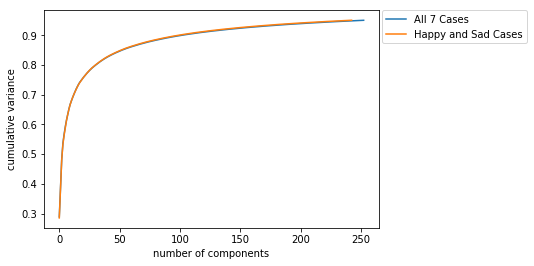

In [413]:
from sklearn.decomposition import PCA

New_x_train = x_training
# Reshape training data for x to allow for PCA and LDA
New_x_train = New_x_train.reshape(28709, 2304)
print(New_x_train.shape)

##### Performing PCA #####
pca2 = PCA(0.95, whiten = True).fit(New_x_train)
components_2 = pca2.components_
print(components_2.shape)

### Cumulative Variance Plot ###
cumulative_var = pca2.explained_variance_ratio_
print(cumulative_var.shape)
## For all 7 ##
plt.plot(np.cumsum(cumulative_var), label="All 7 Cases")
plt.xlabel('number of components')
plt.ylabel('cumulative variance');
## Plot happy and sad cases ##
happy_sad_var = pca.explained_variance_ratio_
print(happy_sad_var.shape)
plt.plot(np.cumsum(happy_sad_var), label="Happy and Sad Cases")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

## Can be seen that there are less components in terms of just happy and sad cases

##### Plotting PCA Cases #####


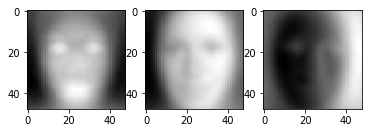

In [414]:
plt.subplot(1,3,1)
plt.imshow(components_2[0].reshape(48,48), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(components_2[1].reshape(48,48), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(components_2[2].reshape(48,48), cmap='gray')

In [416]:
#### Performing LDA ####
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print(New_x_train.shape, all_data_y_train.shape)

lda2 = LDA()
x2_Lda = lda2.fit(New_x_train, all_data_y_train) 

coef2 = x2_Lda.coef_
print(coef2.shape)

(28709, 2304) (28709,)


/Users/hamoudi/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


(7, 2304)


##### Plotting LDA Cases #####


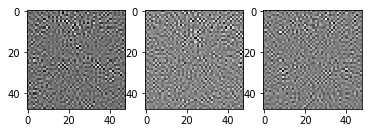

In [417]:
plt.subplot(1,3,1)
plt.imshow(coef2[0].reshape(48,48), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(coef2[1].reshape(48,48), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(coef2[2].reshape(48,48), cmap='gray')

##### Applying Naive Bayes to classify faces as happy or sad. and getting the accuracy ##### 

In [419]:
from sklearn.naive_bayes import GaussianNB

## Reshaping testing data ##
x_testing_2 = x_testing.reshape(3589, 2304)
print(x_testing_2.shape)

#### Perform Naive Bayes ####
gnb_2 = GaussianNB()
gaussian_2 = gnb_2.fit(x_testing_2, all_data_y_test).predict(x_testing_2)

#### Reports the accuracy between X and Y ####
Gaus_accuracy_2 = gnb_2.score(x_testing_2,all_data_y_test)
print("Accuracy from Naive Bayes is: {0}" .format(Gaus_accuracy_2))

(3589, 2304)
Accuracy from Naive Bayes is: 0.22708275285594873


In [420]:
from sklearn.metrics import confusion_matrix

#### Computing prediction using naive bayes ###
y_predictions = gnb_2.fit(New_x_train, all_data_y_train)
y_predictions_23 = y_predictions.predict(x_testing_2)

### Computing confusion matrix ###
confusion_matrix_NB = confusion_matrix(all_data_y_test, y_predictions_23)
print(confusion_matrix_NB)


[[ 20  51  29  50 136 139  42]
 [  2  12   2   4  14  18   4]
 [ 21  36  33  30 116 213  47]
 [ 21 103  25 143 212 271 120]
 [ 33  66  31  63 257 139  64]
 [ 15  30  12  22  43 253  40]
 [ 17  62  23  52 174 181  98]]


##### Applying Logistic Regression to classify faces as happy or sad. and getting the accuracy ##### 

In [421]:
from sklearn.linear_model import LogisticRegression as LR

#### Performs Logistic Regression ####
Log_reg_2 = LR(random_state=0, solver='lbfgs', multi_class='multinomial').fit(New_x_train, all_data_y_train)

#### Accuracy from Logistic Regression ####
Log_accuracy_2 = Log_reg_2.score(New_x_train, all_data_y_train)
print("Accuracy from Logistic Regression is: {0}" .format(Log_accuracy_2))


Accuracy from Logistic Regression is: 0.38385175380542685


##### Computing a Confussion Matrix ##### 

In [422]:
from sklearn.metrics import confusion_matrix

### Computing prediction for confusion matrix using logistic regression ###
y_pred_3 = Log_reg_2.predict(x_testing_2)

### Computing confusion matrix ###
confusion_2 = confusion_matrix(all_data_y_test, y_pred_3)
print(confusion_2)

[[ 62   0  38 172  70  52  73]
 [  7   0   9  18   8   4  10]
 [ 43   0  60 153  80  60 100]
 [ 37   0  31 633  78  42  74]
 [ 66   0  55 169 155  70 138]
 [ 19   0  37  67  48 194  50]
 [ 40   0  27 179  83  51 227]]


##### Applying Suppor Vector Machine to classify faces as happy or sad. and getting the accuracy ##### 

In [315]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Performs PCA on the testing data ###
pca_svm = PCA(n_components= 4)
Training_x_all = pca.fit_transform(New_x_train)
Testing_all = pca.transform(x_testing_2)

### Standardizing ###
SS = StandardScaler()
Training_x_all = SS.fit_transform(Training_x_all)
Testing_all = SS.transform(Testing_all)

### Performing SVM ###
svm_kernel_all = SVC(C=5.0,kernel='rbf', gamma=0.12,tol=0.00001)
svm_kernel_2_all = svm_kernel.fit(Training_x_all,all_data_y_train)

##Predictions
y_predictions_2_all = svm_kernel_2_all.predict(Testing_all)


In [316]:
## Accuracy ##
svm_accuracy_all=accuracy_score(all_data_y_test, y_predictions_2_all)
print("The accuracy is: {0}".format(svm_accuracy_all))
print('')

## Confusion Matrix ##
confusion_3 = confusion_matrix(all_data_y_test, y_predictions_2_all)
print(confusion_3)

The accuracy is: 0.320980774589022

[[ 33   0   0 433   1   0   0]
 [  1  14   0  41   0   0   0]
 [  1   0  45 445   1   3   1]
 [  1   0   0 893   0   0   1]
 [  2   0   1 621  28   0   1]
 [  0   0   2 297   0 116   0]
 [  0   0   0 584   0   0  23]]


In [357]:
print(Training_x_all.shape, all_data_y_test.shape)
print(all_data_y_train.shape, y_predictions_2_all.shape)
print(x_testing_2.shape, New_x_train.shape)

(28709, 253) (3589,)
(28709,) (3589,)
(3589, 2304) (28709, 2304)


##### Identifing images that are potentially mislabeled. Showing 10 samples based on the method you choose. #####

(28709, 7)
Correct label for 1 should be: neutral
Correct label for 2 should be: surprise
Correct label for 3 should be: angry
Correct label for 4 should be: fear
Correct label for 5 should be: surprise
Correct label for 6 should be: surprise
Correct label for 7 should be: sad
Correct label for 8 should be: sad
Correct label for 9 should be: fear
Correct label for 10 should be: sad


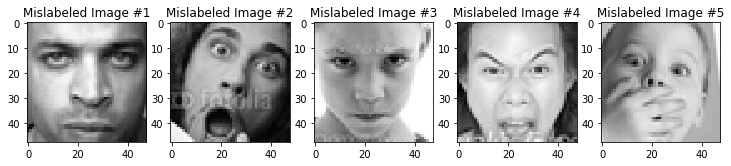

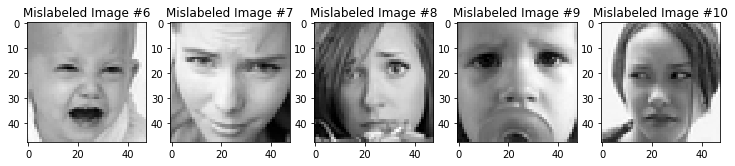

In [429]:
### PCA on x training data
x_train_pca = PCA(0.95, whiten = True).fit_transform(New_x_train)

## Using Logistic Regression to classify
Log_reg_mistakes = LR(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train_pca, all_data_y_train)
mistake_prediction = Log_reg_mistakes.predict_proba(x_train_pca)
print(mistake_prediction.shape)

## Selecting most likely to be a mistake
# choose the max from each row and sort
maximum = np.max(mistake_prediction, axis = 1).argsort()[:11]

### New get emotions function to identify mistake locations 
def get_emotion_new(index):
    if index == 0:
        return 'angry'
    elif index == 1:
        return 'disgust'
    elif index == 2:
        return 'fear'
    elif index == 3:
        return 'happy'
    elif index == 4:
        return 'sad'
    elif index == 5:
        return 'surprise'
    elif index == 6:
        return 'neutral'
    
### Finding which faces they should have been 
face_count=0
for i in range(0,10):
    correct_emotion = get_emotion_new(all_data_y_train[maximum[i]])
    print("Correct label for " +str(face_count+1)+ " should be: " +correct_emotion)
    face_count = face_count +1
    
    
### Plotting the images that are potentially mislabeled
fig_count = 1
fig = plt.figure(figsize=(15,15))
for i in range (0 , 5):
    prediction_expression = x_training[maximum[i] , :]
    prediction_expression = prediction_expression.reshape(48, 48)
    plt.subplot(1, 6, i+1)
    plt.title("Mislabeled Image #" +str(fig_count))
    plt.imshow(prediction_expression, cmap='gray')
    fig_count = fig_count+1

plot_int = 0
fig = plt.figure(figsize=(15,15))
for i in range (6 , 11):
    prediction_expression = x_training[maximum[i] , :]
    prediction_expression = prediction_expression.reshape(48, 48)
    plt.subplot(1, 6, plot_int+1)
    plt.title("Mislabeled Image #" +str(fig_count))
    plt.imshow(prediction_expression, cmap='gray')
    fig_count = fig_count+1
    plot_int = plot_int +1
    
### It can be seen that some may appear to be correct while others are misclassified
## Objective was to see which ones are potentially mislabeled, and it can be seen that
## some of the images are mislabeled while some of the others may not be. 

##### building a t-sne with the images #####

(3589, 7)


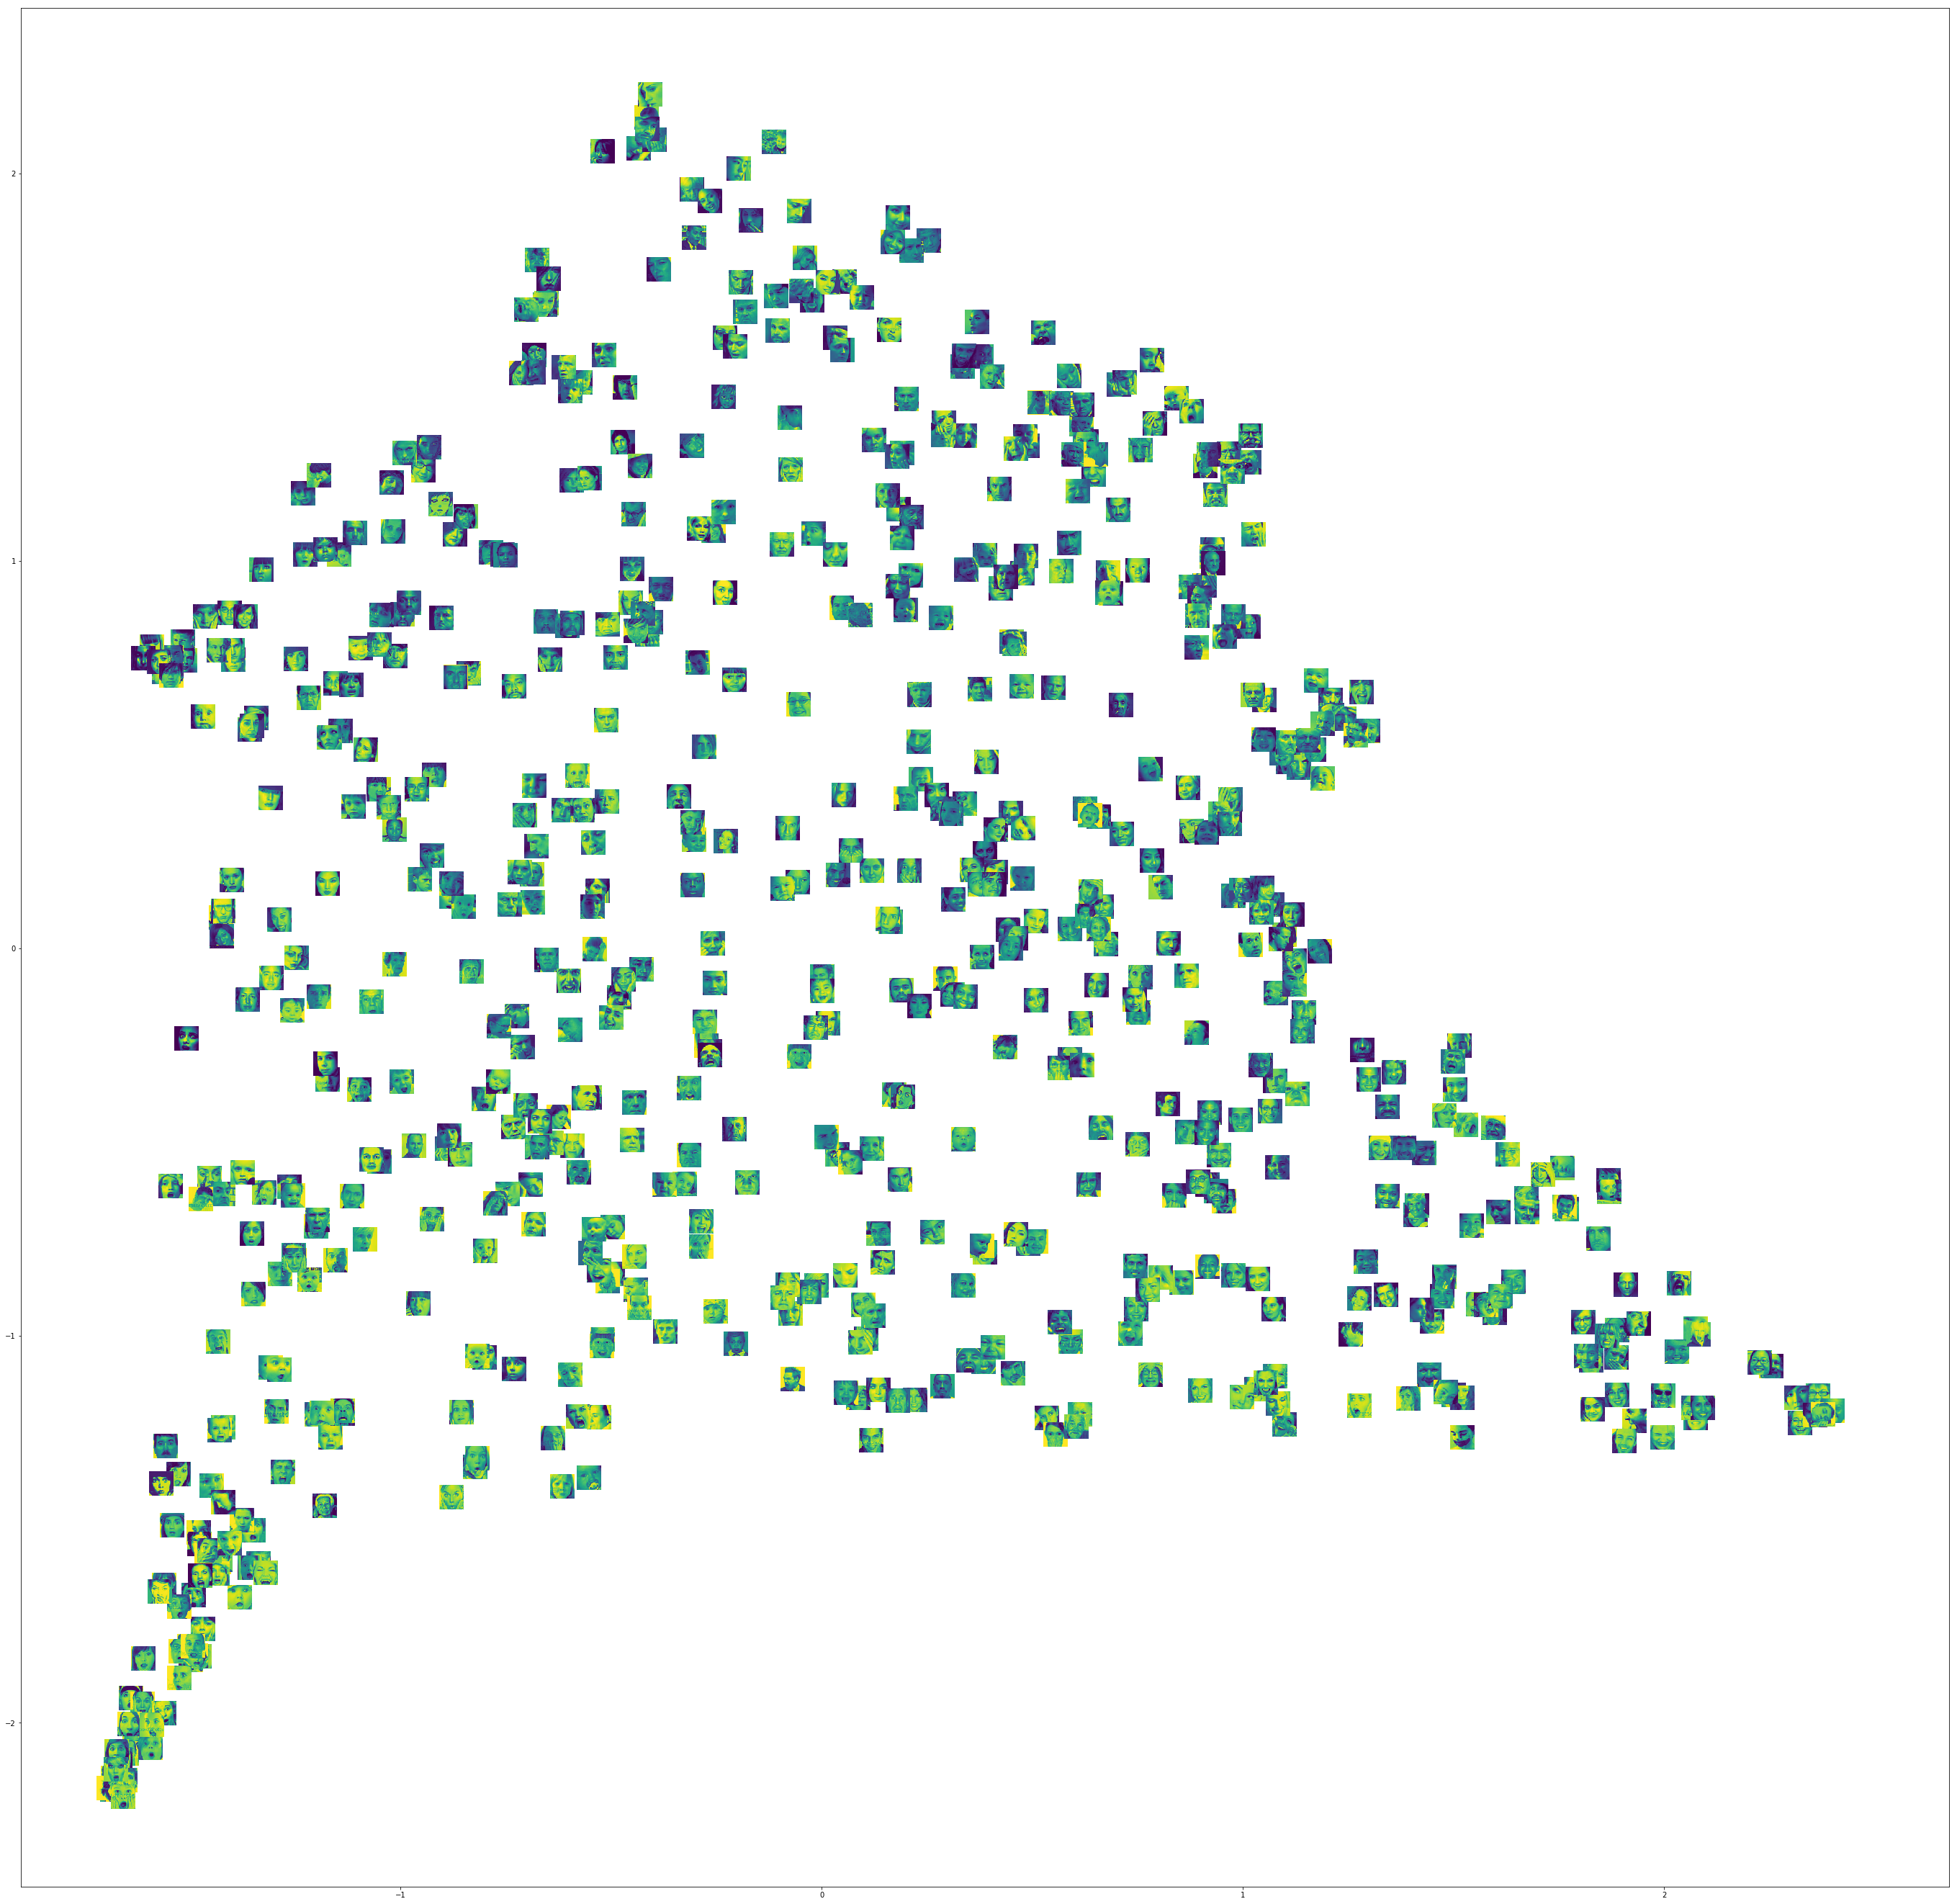

In [364]:
# The following implementation was done with the help from the following links. 
# https://www.scipy-lectures.org/packages/scikit-learn/index.html
# https://www.kaggle.com/gaborvecsei/plants-t-sne
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
from glob import glob
import matplotlib.cm as cm
from sklearn.decomposition import PCA

### PCA on all data ###
all_data_x = New_x_train
pca_all = PCA(0.95, whiten = True).fit(all_data_x)
pca_new_test = pca_all.transform(x_testing_2)
pca_all_data = PCA(0.95, whiten = True).fit_transform(all_data_x)

#### Using logistic regression model to predict probabilities for t-SNE####
log_reg_model_3 = LR(random_state=0, solver='lbfgs',multi_class='multinomial').fit(pca_all_data, all_data_y_train)
probabilities_log_3 = log_reg_model_3.predict_proba(pca_new_test)
print(probabilities_log_3.shape)

## Perfrom t-SNE ##
tsne = TSNE(n_components=2, perplexity=40.0)
result = tsne.fit_transform(probabilities_log_3)
result_scaled = StandardScaler().fit_transform(result)

#### Function to display the data ####
def visualize_scatter_with_images(X_2d_data, testing_images, figsize=(48,48), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, testing_images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()

visualize_scatter_with_images(result_scaled, testing_images = [np.reshape(i, (48,48)) for i in X3], image_zoom=0.7)
